In [ ]:
import cv2
import numpy as np
from PIL import Image

image_path = '5350002-1999-0001-0017.jpg'
image = cv2.imread(image_path)
import matplotlib.pyplot as plt

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis('off')
plt.show()


In [ ]:
with open('res_5350002-1999-0001-0017.txt', 'r', encoding='utf-8') as f:
    lines = f.readlines()

gt_bboxes = []
for line in lines:
    coords = line.split(',')[:8]
    
    coords = [int(coord) for coord in coords]
    gt_bboxes.append(np.array([[coords[i], coords[i+1]] for i in range(0, len(coords), 2)]))
gt_bboxes[0]

In [ ]:
image_gt = image.copy()
image_gt = cv2.polylines(image_gt,[bbox for bbox in gt_bboxes], True, (0, 0, 255), 2)
plt.figure(figsize=(8, 8))
plt.imshow(image_gt)
plt.axis('off')
plt.show()

In [ ]:
with open('5350002-1999-0001-0017_infered.txt', 'r', encoding='utf-8') as f:
    dlines = f.readlines()

dt_bboxes = []
for line in dlines:
    coords = line.strip().split(',')
    coords = [int(coord) for coord in coords]
    grouped_coords = [[coords[i], coords[i+1]] for i in range(0, len(coords), 2)]
    dt_bboxes.append(grouped_coords)


In [ ]:
image_dt = image.copy()
contours = np.array(dt_bboxes, dtype=np.int32)
cv2.drawContours(image_dt, contours, -1, (255, 0, 0), 2)

plt.figure(figsize=(8, 8))
plt.imshow(image_dt)
plt.axis('off')
plt.show()

In [86]:
image_dt.shape

(3507, 2480, 3)

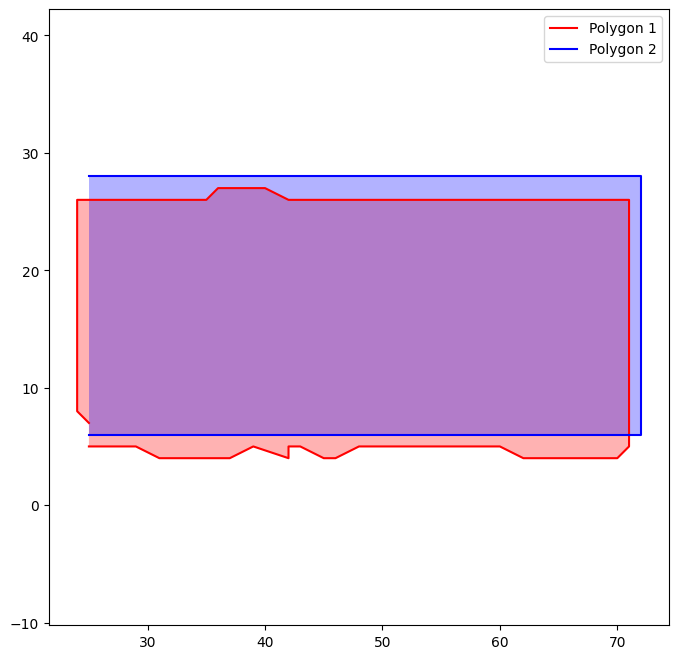

In [2]:
import matplotlib.pyplot as plt
import numpy as np

coords1 = [25,7,24,8,24,9,24,10,24,12,24,13,24,14,24,15,24,17,24,18,24,19,24,21,24,22,24,24,24,26,25,26,26,26,28,26,29,26,30,26,31,26,32,26,34,26,35,26,36,27,38,27,39,27,40,27,42,26,42,26,44,26,46,26,47,26,48,26,50,26,51,26,52,26,53,26,55,26,56,26,57,26,58,26,60,26,61,26,62,26,64,26,64,26,66,26,67,26,70,26,71,26,71,24,71,22,71,21,71,19,71,18,71,17,71,15,71,14,71,13,71,11,71,9,71,7,71,5,70,4,69,4,67,4,67,4,65,4,63,4,62,4,60,5,59,5,58,5,56,5,55,5,54,5,53,5,52,5,50,5,49,5,48,5,46,4,45,4,43,5,42,5,42,4,39,5,39,5,37,4,35,4,35,4,33,4,32,4,31,4,29,5,28,5,27,5,25,5,25,5]
coords2 = [25,6,72,6,72,28,25,28]

polygon1 = np.array(coords1).reshape(-1, 2)
polygon2 = np.array(coords2).reshape(-1, 2)

plt.figure(figsize=(8, 8))
plt.plot(polygon1[:, 0], polygon1[:, 1], 'r-', label='Polygon 1')
plt.plot(polygon2[:, 0], polygon2[:, 1], 'b-', label='Polygon 2')
plt.fill(polygon1[:, 0], polygon1[:, 1], 'r', alpha=0.3)
plt.fill(polygon2[:, 0], polygon2[:, 1], 'b', alpha=0.3)
plt.legend()
plt.axis('equal')
plt.show()
